In [2]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [4]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [5]:
len(dataset)

60000

In [6]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [11]:
!pip install matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d7/68/0d03098b3feb786cbd494df0aac15b571effda7f7cbdec267e8a8d398c16/matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a8/7e/cd93cab453720a5d6cb75588cc17dcdc08fc3484b9de98b885924ff61900/contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/3b/90/4926e653041c4116ecd43e50e3c79f5daae6dcafc58ceb64bc4f71dd4924/fonttools-4.56.0-cp311-cp311-win_amd64.whl.metadata
 

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

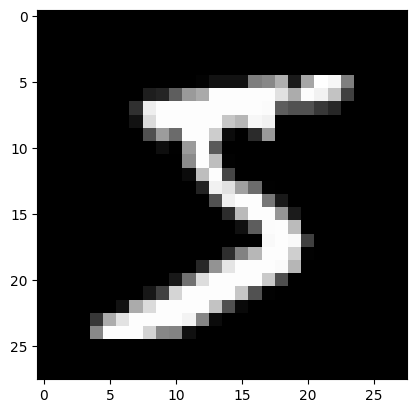

Label: 5


In [9]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
plt.show()
print('Label:', label)

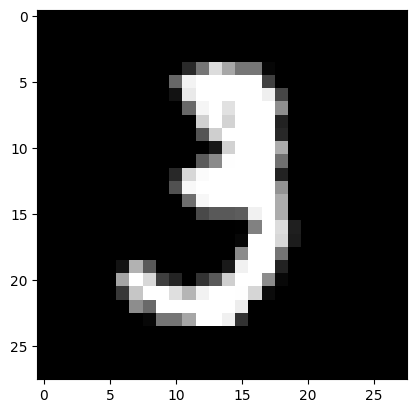

Label: 3


In [10]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
plt.show()
print('Label:', label)

In [11]:
import torchvision.transforms as transforms

In [13]:

dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [14]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [15]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


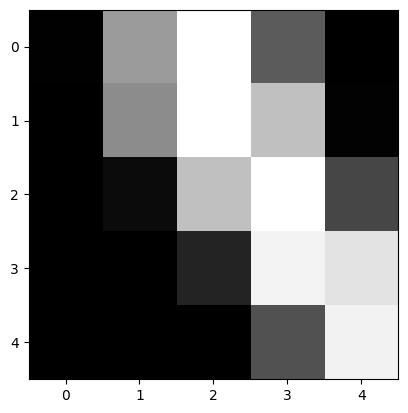

In [16]:

plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');
plt.show()

In [17]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [18]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [19]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [20]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0042, -0.0313,  0.0052,  ...,  0.0059,  0.0296, -0.0250],
        [-0.0230,  0.0164,  0.0166,  ..., -0.0137,  0.0173,  0.0199],
        [ 0.0267,  0.0312, -0.0245,  ..., -0.0015,  0.0347,  0.0353],
        ...,
        [-0.0063,  0.0184, -0.0295,  ..., -0.0263, -0.0021, -0.0034],
        [ 0.0325, -0.0262,  0.0295,  ..., -0.0064,  0.0347,  0.0250],
        [-0.0357, -0.0278,  0.0285,  ..., -0.0293, -0.0190, -0.0250]],
       requires_grad=True)

In [21]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0094, -0.0166,  0.0313,  0.0020,  0.0161, -0.0256,  0.0144, -0.0160,
        -0.0080, -0.0043], requires_grad=True)

In [22]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([3, 5, 4, 0, 8, 5, 1, 1, 3, 6, 0, 1, 9, 6, 1, 9, 0, 8, 0, 1, 1, 9, 4, 8,
        3, 5, 8, 5, 1, 5, 5, 7, 0, 6, 3, 6, 6, 2, 0, 4, 8, 4, 3, 9, 7, 9, 3, 2,
        2, 4, 2, 9, 0, 5, 1, 6, 1, 8, 4, 0, 2, 2, 7, 0, 2, 4, 5, 6, 4, 6, 8, 8,
        2, 4, 1, 9, 1, 8, 1, 4, 1, 0, 3, 4, 9, 7, 3, 3, 4, 6, 5, 6, 2, 0, 2, 2,
        3, 7, 5, 0, 9, 7, 1, 7, 4, 0, 4, 0, 7, 8, 4, 7, 0, 6, 3, 4, 2, 1, 3, 9,
        9, 8, 6, 7, 9, 7, 1, 4])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [23]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [24]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0301, -0.0208, -0.0103,  ...,  0.0094, -0.0043, -0.0114],
         [-0.0164, -0.0285,  0.0289,  ...,  0.0054, -0.0126,  0.0292],
         [ 0.0247, -0.0249, -0.0203,  ..., -0.0141,  0.0294,  0.0066],
         ...,
         [ 0.0056, -0.0291,  0.0118,  ...,  0.0334, -0.0244, -0.0184],
         [ 0.0221, -0.0251,  0.0017,  ..., -0.0100,  0.0018, -0.0023],
         [-0.0142, -0.0309, -0.0195,  ..., -0.0216, -0.0160, -0.0164]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0036,  0.0230,  0.0223, -0.0136,  0.0348,  0.0035,  0.0217, -0.0083,
          0.0222, -0.0275], requires_grad=True)]

In [25]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1923, -0.0935, -0.2076, -0.0260,  0.0572,  0.1179, -0.0448, -0.1001,
          0.1536,  0.0242],
        [-0.0304, -0.1640,  0.0635, -0.3794,  0.1091, -0.0562, -0.0869, -0.0202,
          0.3237,  0.2002]])


In [26]:
import torch.nn.functional as F

In [27]:
probs = F.softmax(outputs, dim=1)

print("Sample probabilities:\n", probs[:2].data)

print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1195, 0.0898, 0.0801, 0.0960, 0.1044, 0.1109, 0.0942, 0.0892, 0.1149,
         0.1010],
        [0.0958, 0.0838, 0.1052, 0.0675, 0.1101, 0.0933, 0.0905, 0.0967, 0.1365,
         0.1206]])
Sum:  0.9999999403953552


In [28]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 8, 5, 6, 8, 9, 8, 8, 9, 4, 5, 9, 8, 8, 3, 8, 8, 8, 5, 8, 5, 8, 4, 8,
        8, 9, 8, 8, 8, 9, 8, 8, 8, 3, 8, 0, 4, 8, 4, 8, 2, 8, 8, 5, 5, 8, 8, 8,
        5, 3, 4, 9, 8, 3, 8, 5, 8, 9, 8, 8, 4, 5, 8, 8, 2, 0, 4, 8, 4, 9, 8, 5,
        8, 4, 5, 8, 4, 8, 8, 8, 5, 8, 4, 8, 8, 8, 8, 8, 5, 8, 8, 8, 5, 8, 4, 8,
        8, 9, 2, 9, 8, 9, 8, 0, 0, 8, 5, 9, 4, 8, 0, 5, 8, 3, 8, 5, 2, 8, 8, 0,
        8, 8, 8, 4, 8, 8, 8, 5])
tensor([0.1195, 0.1365, 0.1304, 0.1171, 0.1360, 0.1287, 0.1381, 0.1339, 0.1208,
        0.1216, 0.1247, 0.1203, 0.1260, 0.1295, 0.1136, 0.1114, 0.1473, 0.1247,
        0.1348, 0.1546, 0.1329, 0.1123, 0.1511, 0.1399, 0.1270, 0.1194, 0.1347,
        0.1355, 0.1318, 0.1412, 0.1569, 0.1363, 0.1259, 0.1193, 0.1280, 0.1492,
        0.1171, 0.1287, 0.1226, 0.1614, 0.1259, 0.1163, 0.1263, 0.1324, 0.1259,
        0.1411, 0.1311, 0.1449, 0.1491, 0.1163, 0.1242, 0.1430, 0.1489, 0.1175,
        0.1331, 0.1326, 0.1392, 0.1259, 0.1386, 0.1311, 0.1392, 0.1229, 0.1267,
       

In [29]:
labels

tensor([7, 7, 9, 1, 7, 6, 3, 9, 9, 6, 7, 7, 0, 9, 1, 1, 5, 5, 3, 9, 5, 4, 2, 3,
        6, 2, 9, 8, 3, 6, 5, 5, 4, 9, 7, 2, 2, 0, 3, 2, 9, 2, 7, 5, 3, 8, 2, 2,
        5, 5, 0, 0, 8, 1, 3, 5, 3, 3, 5, 8, 9, 8, 1, 5, 5, 2, 4, 6, 1, 3, 6, 1,
        3, 4, 1, 9, 4, 0, 0, 2, 5, 9, 7, 8, 5, 8, 0, 4, 2, 8, 3, 1, 8, 6, 0, 6,
        8, 0, 4, 0, 4, 1, 3, 6, 2, 4, 0, 6, 3, 7, 6, 0, 3, 9, 0, 7, 5, 9, 3, 0,
        0, 1, 9, 1, 9, 8, 8, 8])

In [30]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [31]:
accuracy(outputs, labels)


tensor(0.1562)

In [32]:
loss_fn = F.cross_entropy

In [33]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2775, grad_fn=<NllLossBackward0>)


In [34]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [35]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [36]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [37]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3314290046691895, 'val_acc': 0.09088212251663208}

In [38]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9667, val_acc: 0.5894
Epoch [1], val_loss: 1.6943, val_acc: 0.7175
Epoch [2], val_loss: 1.4905, val_acc: 0.7558
Epoch [3], val_loss: 1.3369, val_acc: 0.7746
Epoch [4], val_loss: 1.2188, val_acc: 0.7880


In [48]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1254, val_acc: 0.7995
Epoch [1], val_loss: 1.0530, val_acc: 0.8086
Epoch [2], val_loss: 0.9937, val_acc: 0.8146
Epoch [3], val_loss: 0.9443, val_acc: 0.8190
Epoch [4], val_loss: 0.9024, val_acc: 0.8230


In [49]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8665, val_acc: 0.8269
Epoch [1], val_loss: 0.8354, val_acc: 0.8303
Epoch [2], val_loss: 0.8081, val_acc: 0.8349
Epoch [3], val_loss: 0.7839, val_acc: 0.8382
Epoch [4], val_loss: 0.7625, val_acc: 0.8408


In [50]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7432, val_acc: 0.8428
Epoch [1], val_loss: 0.7257, val_acc: 0.8459
Epoch [2], val_loss: 0.7099, val_acc: 0.8475
Epoch [3], val_loss: 0.6954, val_acc: 0.8490
Epoch [4], val_loss: 0.6822, val_acc: 0.8505


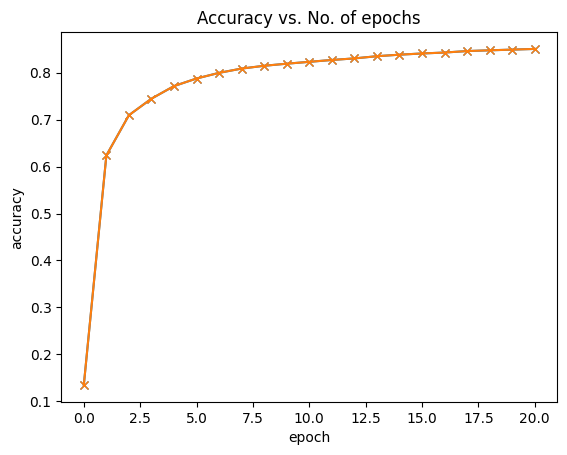

In [52]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');
plt.show();

In [53]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


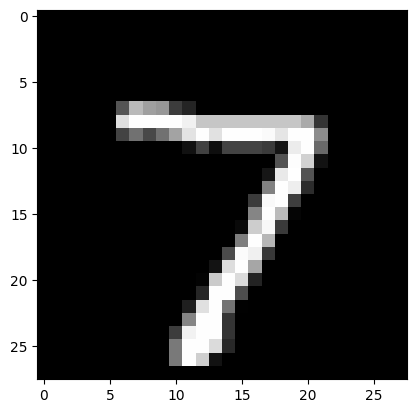

In [55]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)
plt.show()

In [58]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    plt.show()
    return preds[0].item()

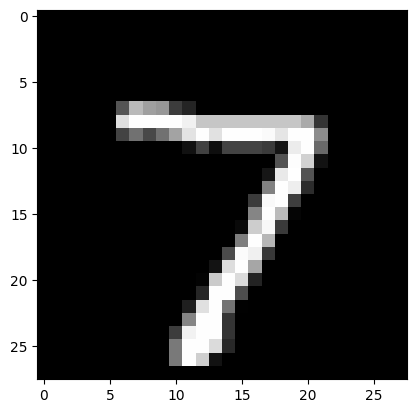

Label: 7 , Predicted: 7


In [59]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

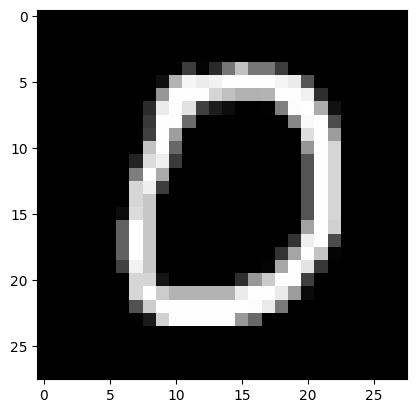

Label: 0 , Predicted: 0


In [60]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

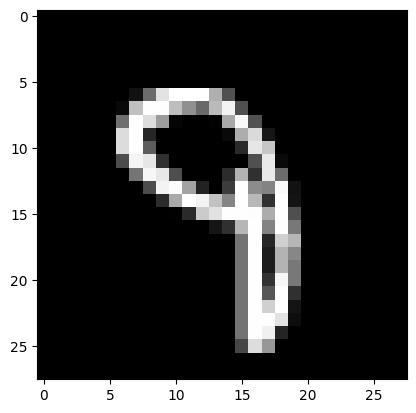

Label: 9 , Predicted: 4


In [61]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [39]:
img, label = test_dataset[189]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

TypeError: 'Image' object is not subscriptable

In [64]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6424844861030579, 'val_acc': 0.8583008050918579}

In [65]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [66]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0102, -0.0320,  0.0177,  ..., -0.0015,  0.0215,  0.0086],
                      [-0.0328,  0.0095,  0.0039,  ...,  0.0054,  0.0280,  0.0071],
                      [ 0.0131,  0.0324,  0.0245,  ...,  0.0077,  0.0313, -0.0022],
                      ...,
                      [ 0.0329, -0.0213,  0.0245,  ..., -0.0171, -0.0270, -0.0048],
                      [-0.0183, -0.0278,  0.0018,  ...,  0.0227,  0.0133,  0.0273],
                      [-0.0333, -0.0145,  0.0011,  ..., -0.0115, -0.0235,  0.0025]])),
             ('linear.bias',
              tensor([-0.0587,  0.0648, -0.0096, -0.0188,  0.0154,  0.0566,  0.0078,  0.0451,
                      -0.0889, -0.0310]))])

In [67]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0102, -0.0320,  0.0177,  ..., -0.0015,  0.0215,  0.0086],
                      [-0.0328,  0.0095,  0.0039,  ...,  0.0054,  0.0280,  0.0071],
                      [ 0.0131,  0.0324,  0.0245,  ...,  0.0077,  0.0313, -0.0022],
                      ...,
                      [ 0.0329, -0.0213,  0.0245,  ..., -0.0171, -0.0270, -0.0048],
                      [-0.0183, -0.0278,  0.0018,  ...,  0.0227,  0.0133,  0.0273],
                      [-0.0333, -0.0145,  0.0011,  ..., -0.0115, -0.0235,  0.0025]])),
             ('linear.bias',
              tensor([-0.0587,  0.0648, -0.0096, -0.0188,  0.0154,  0.0566,  0.0078,  0.0451,
                      -0.0889, -0.0310]))])

In [68]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6424844861030579, 'val_acc': 0.8583008050918579}